# Monitoring the model stability
Plot the location of the maximum vertical velocity (w_bt) and its time seriers.

In [1]:
# import modules
%matplotlib inline

import cosima_cookbook as cc

import matplotlib.pyplot as plt
import matplotlib.cm as cm # colormap
import numpy as np
import netCDF4 as nc
import re # extract string
import glob # join multi files

In [2]:
# read longitude and latitude variables
file_obs = nc.Dataset('/g/data3/hh5/tmp/cosima/mom01v5/KDS75_newbathy_JRA/output000/ocean.nc')
lat = file_obs.variables['yt_ocean'][:]
lon = file_obs.variables['xt_ocean'][:]

In [3]:
w_bt = []
x_index = []
y_index = []
dpt_index = []
#pattern = r'\(i,j,k\) = \((.+)\),'
pattern = r'\(lon,lat,dpt\) = \((.+)\)'

# read the mom.out in different directory and sort them
files = sorted(glob.glob(r'/g/data3/hh5/tmp/cosima/mom01v5/KDS75_newbathy_JRA/output0*/mom.out'))
print(files)
for filename in files: 
    for line in open(filename,"r"):
# search CFL w_bt        
        if "w_bt (" in line:
#            print(line)
# extract the index of the maximum w_bt (longitude, latitude)
             result = re.search(pattern, line)
#            print(result)
             ni,nj,nk = re.split('[\,]+',result.group(1))
             x_index.append(ni)
             y_index.append(nj)
             dpt_index.append(nk)
# extract the percent value of w_bt            
             w_bt.extend(re.findall(r"is(.+?)%",line))
print(len(w_bt))            

['/g/data3/hh5/tmp/cosima/mom01v5/KDS75_newbathy_JRA/output000/mom.out', '/g/data3/hh5/tmp/cosima/mom01v5/KDS75_newbathy_JRA/output001/mom.out', '/g/data3/hh5/tmp/cosima/mom01v5/KDS75_newbathy_JRA/output002/mom.out', '/g/data3/hh5/tmp/cosima/mom01v5/KDS75_newbathy_JRA/output003/mom.out', '/g/data3/hh5/tmp/cosima/mom01v5/KDS75_newbathy_JRA/output004/mom.out', '/g/data3/hh5/tmp/cosima/mom01v5/KDS75_newbathy_JRA/output005/mom.out', '/g/data3/hh5/tmp/cosima/mom01v5/KDS75_newbathy_JRA/output006/mom.out', '/g/data3/hh5/tmp/cosima/mom01v5/KDS75_newbathy_JRA/output007/mom.out', '/g/data3/hh5/tmp/cosima/mom01v5/KDS75_newbathy_JRA/output008/mom.out', '/g/data3/hh5/tmp/cosima/mom01v5/KDS75_newbathy_JRA/output009/mom.out', '/g/data3/hh5/tmp/cosima/mom01v5/KDS75_newbathy_JRA/output010/mom.out', '/g/data3/hh5/tmp/cosima/mom01v5/KDS75_newbathy_JRA/output011/mom.out', '/g/data3/hh5/tmp/cosima/mom01v5/KDS75_newbathy_JRA/output012/mom.out', '/g/data3/hh5/tmp/cosima/mom01v5/KDS75_newbathy_JRA/output013/m

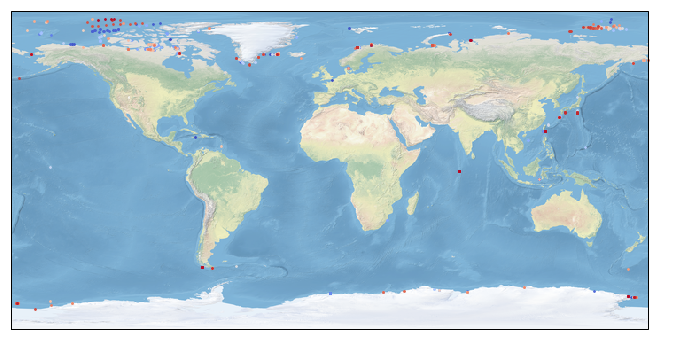

In [4]:
import cartopy.crs as ccrs

plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

# change format from string to float
yy = np.array(list(map(float,y_index)))
xx = np.array(list(map(float,x_index)))
#colors = cm.Blues(np.linspace(0, 1, len(yy)))
# create a array colors, which color changes with the index
colors = cm.coolwarm(np.linspace(0, 1, len(yy)))
for index in range(len(x_index)): 
# plot the location of w_bt, which warmer color means the later result.
    #ax.scatter(lon[int(x_index[index])-1],lat[int(y_index[index])-1],s=3,c=colors[index-1]);
    if (xx[index]<0.):
        xx[index] = xx[index] + 360
    ax.scatter(xx[index],yy[index],s=3,c=colors[index]);

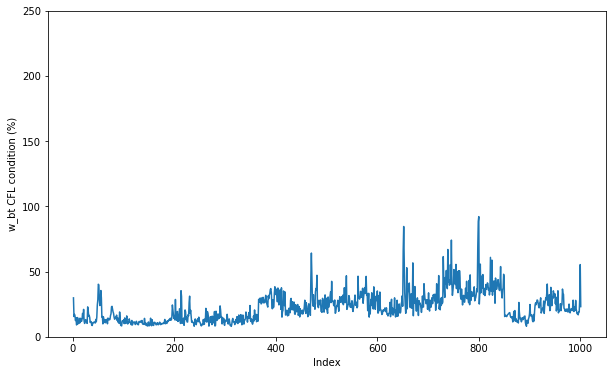

In [6]:
# plot the time series of w_bt so far, which value increases with the time step increasing.
wwlen = len(w_bt)
wwn = np.arange(1,wwlen+1,1)
ww = np.array(list(map(float, w_bt)))
plt.ylabel('w_bt CFL condition (%)')
plt.xlabel('Index')
plt.ylim(0,250)
plt.plot(wwn,ww)